In [1]:
!pip install stop-words

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=b022f7ac7eef633b1bd87aad52ede13adf8720069aac59e395f0082ed0dc74a9
  Stored in directory: c:\users\behlul\appdata\local\pip\cache\wheels\da\d8\66\395317506a23a9d1d7de433ad6a7d9e6e16aab48cf028a0f60
Successfully built stop-words


In [4]:
!pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 153.1/153.1 kB 830.4 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
import re

from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [6]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.columns=['Class','Text']
df['Label']=df.Class.map({'ham':0,'spam':1})
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
df.groupby('Class').describe(include='O')

Text                                                               
      count unique                                                top freq
Class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

<AxesSubplot:xlabel='Class', ylabel='count'>

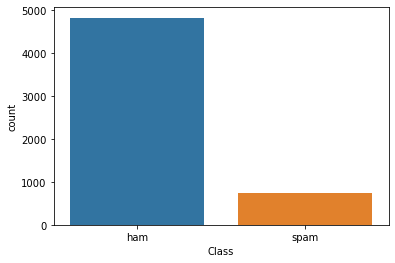

In [10]:
sns.countplot(data=df,x='Class')

In [11]:
df['Text']=df['Text'].str.lower()

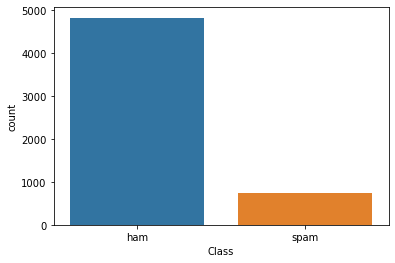

In [12]:
sns.countplot(data=df,x='Class');

In [14]:
Ham_texts=df.query("Class=='ham'")['Text']
Spam_texts=df.query("Class=='spam'")['Text']

In [15]:
Ham_texts

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
6       even my brother is not like to speak with me. ...
                              ...                        
5565                                         huh y lei...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Text, Length: 4825, dtype: object

In [17]:
def words_cleaner(data):
    words=[re.sub('[^a-zA-Z]',' ',i) for i in df['Text']]
    words=[i.lower() for j in data for i in j.split()]
    words=[i for i in words if not i in set(stopwords.words('english'))]
    words=[i for i in words if len(i)>2]
    return words

In [29]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,max_words=100)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [25]:
Ham_texts=df.query('Class=="ham"')['Text']
ham_words=words_cleaner(Ham_texts)
ham_words_freq=nltk.FreqDist(ham_words)
ham_words_freq=pd.DataFrame(ham_words_freq.most_common(10),columns=['Top_Words','Frequency'])

In [26]:
ham_words_freq

,Top_Words,Frequency
0,i'm,369
1,get,293
2,&lt;#&gt;,276
3,got,227
4,like,221
5,call,215
6,come,215
7,know,208
8,good,187
9,i'll,167


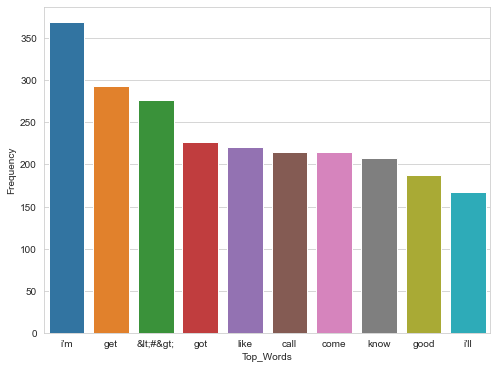

In [27]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
ax=sns.barplot(x='Top_Words',y='Frequency',data=ham_words_freq)

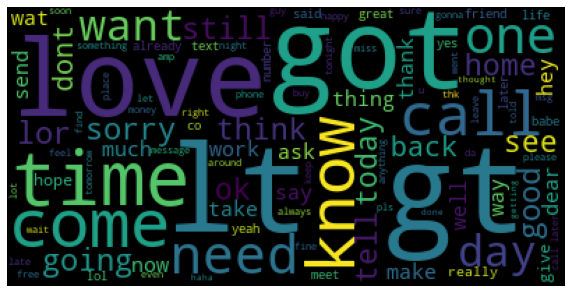

In [30]:
wc(ham_words,'black')

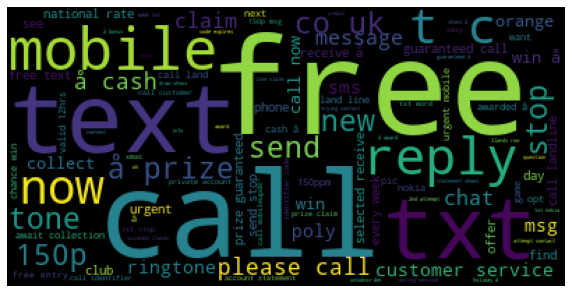

In [31]:
wc(words_cleaner(Spam_texts),'black')

In [34]:
def features_cleaner(data):
    clean_txt=[]
    for i in range(0,len(data)):
        text=re.sub('[^a-zA-Z]',' ',data[i])
        text=text.lower()
        text=text.split()
        ps=PorterStemmer()
        text=[ps.stem(j) for j in text if not j in set(stopwords.words('english'))]
        text=' '.join(text)
        clean_txt.append(text)
    return clean_txt

In [36]:
x=features_cleaner(df['Text'])
y=df['Label']

In [37]:
for i in range(0,3):
    print(df['Text'][i])
print('....................after cleaning.......................')
for i in range(0,3):
    print(x[i])

go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...
ok lar... joking wif u oni...
free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's
....................after cleaning.......................
go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli


In [39]:
cv=CountVectorizer()
x=cv.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

In [40]:
classifier=MultinomialNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [43]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[1178,   15],
       [  16,  184]], dtype=int64)

<AxesSubplot:>

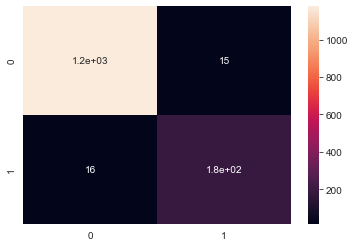

In [44]:
sns.heatmap(cf_matrix,annot=True)

In [46]:
accuracy_score(y_pred,y_test)

0.9777458722182341

In [48]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [49]:
r.fit(x_train,y_train)
y_pred=r.predict(x_test)

In [50]:
r_matrix=confusion_matrix(y_test,y_pred)
r_matrix

array([[1193,    0],
       [  35,  165]], dtype=int64)

<AxesSubplot:>

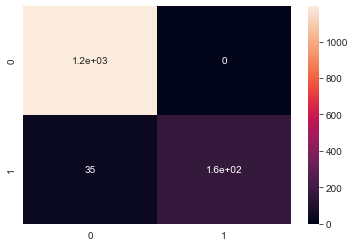

In [51]:
sns.heatmap(r_matrix,annot=True)

In [52]:
d.fit(x_train,y_train)
y_pred=d.predict(x_test)

In [53]:
d_matrix=confusion_matrix(y_test,y_pred)
d_matrix

array([[1177,   16],
       [  32,  168]], dtype=int64)